In [1]:
#!/usr/bin/env python
# coding: utf-8

from dataio.datahandler import datahandler
from dataio.datareader import datareader
from models.TDCNNv1 import TDCNNv1
from config import *
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import matplotlib
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.models import load_model
import sklearn.preprocessing
%matplotlib inline 
# %matplotlib notebook 
# matplotlib.rcParams['figure.dpi']= 300


2023-05-26 17:52:15.966299: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dataset_root_path = '/home/veronica/USANNIOMIT/sen2dwater_combined' # TODO: adjust path
dh       = datahandler(dataset_root_path)
train_set, val_set = dh.split(SPLIT_FACTOR)


BATCH_SIZE = 30
SHAPE      = (128, 128)
NORMALIZE  = True


NDVIval2 = datareader.generatorv2('NDVI',val_set,
                                        BATCH_SIZE,
                                        T_LEN,
                                        SHAPE,
                                        normalize=NORMALIZE)
NDWIval2 = datareader.generatorv2('NDWI',val_set,
                                        BATCH_SIZE,
                                        T_LEN,
                                        SHAPE,
                                        normalize=NORMALIZE)
NDDIval2 = datareader.generatorv2('NDDI',val_set,
                                        BATCH_SIZE,
                                        T_LEN,
                                        SHAPE,
                                        normalize=NORMALIZE)



# our trained ndwi model
# ndwi_model = load_model('/content/drive/MyDrive/results-lenovo/ndwi_model.h5')

# model from francesco
ndwi_model = load_model('/home/veronica/USANNIOMIT/ndwi_model2.h5')
# ndwi_model = load_model('/content/drive/MyDrive/results-lenovo2/ndwi_model2.h5')

ndvi_model = load_model('/home/veronica/USANNIOMIT/ndvi_model2.h5')
# ndvi_model = load_model('/content/drive/MyDrive/results-lenovo2/ndvi_model2.h5')

nddi_model = load_model('/home/veronica/USANNIOMIT/nddi_model.model_small_val_is_point_1.h5')

NDVI_input, NDVI_gt =  NDVIval2
NDWI_input, NDWI_gt =  NDWIval2
NDDI_input, NDDI_gt =  NDDIval2

ndvi_prediction = ndvi_model.predict(NDVI_input)
ndwi_prediction = ndwi_model.predict(NDWI_input)
nddi_prediction = nddi_model.predict(NDDI_input)

shape = nddi_prediction.shape # Batch (), Width, Height, (NDWI, NNDI or NDVI)

def getNDDI(NDVI,NDWI):
  return (NDVI-NDWI)/(NDVI+NDWI+1)

nddi_from_NDVI_NDWI = []
for i in range(shape[0]): # get NDDI from NDWI and NDVI
  ndvi = ndvi_prediction[i]
  ndwi = ndwi_prediction[i]
  nddi_from_NDVI_NDWI.append(getNDDI(ndvi,ndwi))

NDDItheoreticGT = getNDDI(NDVI_gt,NDWI_gt)





dataset:  1028
batch_size:  40
dataset:  1028
batch_size:  40
dataset:  1028
batch_size:  40


2023-05-26 17:52:28.789455: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-26 17:52:28.790637: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


2/2 [==============================] - 7s 2s/step


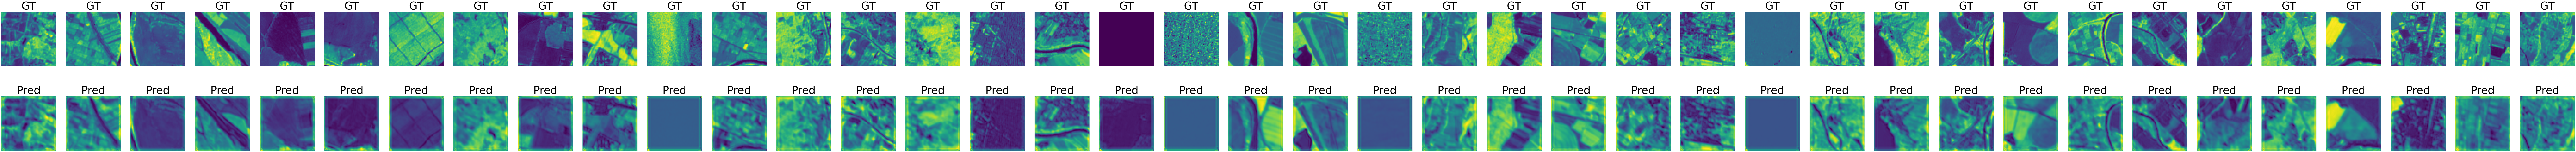

In [3]:
fig, axes = plt.subplots(nrows = 2, ncols = BATCH_SIZE, figsize = (BATCH_SIZE*5,3*5))
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 22}

# matplotlib.rc('font', **font)

# plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = "50"

for i in range(BATCH_SIZE):
  axes[1,i].imshow(ndvi_prediction[i,:,:,0])
  axes[0,i].imshow(NDVI_gt[i,:,:,0])

  axes[1,i].set_title('Pred')
  axes[0,i].set_title('GT')

  axes[0,i].axis(False)
  axes[1,i].axis(False)


fig.tight_layout()
# %matplotlib qt 
plt.savefig('img/ndvi.png')
# fig.savefig('ndvi.svg', format='svg', dpi=1200)
# fig.savefig('ndvi.eps')
plt.show()
# plt.close()

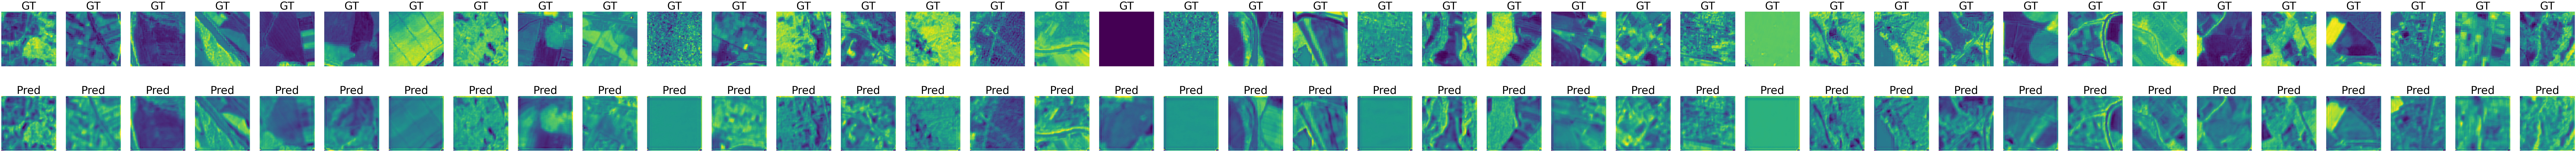

In [4]:
fig, axes = plt.subplots(nrows = 2, ncols = BATCH_SIZE, figsize = (BATCH_SIZE*5,3*5))
for i in range(BATCH_SIZE):
  axes[1,i].imshow(ndwi_prediction[i,:,:,0])
  axes[0,i].imshow(NDWI_gt[i,:,:,0])

  axes[1,i].set_title('Pred')
  axes[0,i].set_title('GT')

  axes[1,i].axis(False)
  axes[0,i].axis(False)

fig.tight_layout()
plt.savefig('img/ndwi.png')

# fig.savefig('ndwi.svg', format='svg', dpi=1200)
# fig.savefig('ndwi.eps')
plt.show()
# plt.close()

# fig, axes = plt.subplots(nrows = 3, ncols = BATCH_SIZE, figsize = (BATCH_SIZE*5,3*5))
# for i in range(BATCH_SIZE):
#   axes[0,i].imshow(nddi_prediction[i,:,:,0])
#   axes[1,i].imshow(NDDI_gt[i,:,:,0])
#   axes[2,i].imshow(NDDItheoreticGT[i,:,:,0])

#   axes[0,i].set_title('NDDI Prediction')
#   axes[1,i].set_title('NDDI Ground Truth')
#   axes[2,i].set_title('NDDI Theoretic GT')

#   axes[0,i].axis(False)
#   axes[1,i].axis(False)
#   axes[2,i].axis(False)

# fig.tight_layout()
# plt.show()
# plt.close()



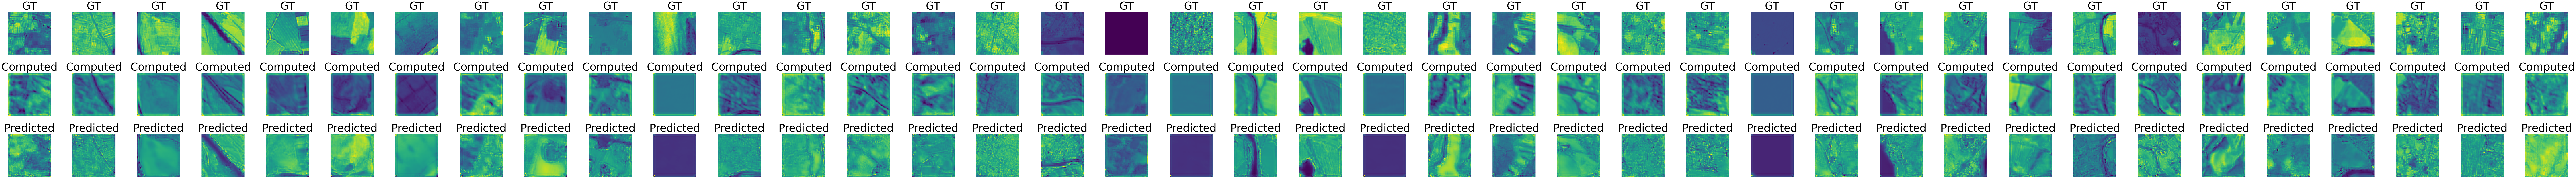

In [5]:
fig, axes = plt.subplots(nrows = 3, ncols = BATCH_SIZE, figsize = (BATCH_SIZE*5,3*5))
for i in range(BATCH_SIZE):
#   axes[0,i].imshow(nddi_from_NDVI_NDWI[i,:,:,0])
  axes[0,i].imshow(NDDI_gt[i,:,:,0])
  axes[1,i].imshow(nddi_from_NDVI_NDWI[i])
  axes[2,i].imshow(nddi_prediction[i,:,:,0])


  axes[0,i].set_title('GT')
  axes[1,i].set_title('Computed')
  axes[2,i].set_title('Predicted')

  axes[0,i].axis(False)
  axes[1,i].axis(False)
  axes[2,i].axis(False)

fig.tight_layout()
plt.savefig('img/nddi.png')
# fig.savefig('nddi.svg', format='svg', dpi=1200)
# fig.savefig('nddi.eps')
plt.show()
# plt.close()